# **Linear Regression Model**

### Data Pre-Processing

In [1]:
#Import Libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Reading the Data
data = pd.read_csv("/Users/arnav/Desktop/Arnav Code/Introduction to Intelligent Systems/2021519_Assignment3/Q2_insurance_dataset.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
def bool_gender(x): #We given binary values to gender i.e. 0 for female and 1 for male
    if x == 'female':
      return 0
    else:
      return 1

def bool_smoker(x): #We given binary values for smoking i.e. 0 for no and 1 for yes
  if x == 'yes':
    return 1
  else:
    return 0

def bool_region(x): #We given int values for region
  if x == 'southwest':
    return 1
  elif x == 'southeast':
    return 2
  elif x == 'northeast':
    return 3
  else:
    return 4


data['sex'] = data['sex'].apply(bool_gender)
data['smoker'] = data['smoker'].apply(bool_smoker)
data['region'] = data['region'].apply(bool_region)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


### Splitting the Dataset

In [3]:
arr1 = data["charges"] #Array containing values of charges to be splitted
arr2 = data.drop(['charges'], axis = 1) #Removes column containing charges from data and prepares arr2 for splitting
print(arr2)

#This command splits the data into a 80:20 ratio with 20% randomly chosen for testing.
train_data, test_data, train_label, test_label = train_test_split(arr2, arr1, test_size = 0.2, random_state = 15)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       4
4      32    1  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       4
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       4

[1338 rows x 6 columns]


### Building & Training the Model

In [4]:
model = LinearRegression()
model.fit(train_data, train_label)

LinearRegression()

### Predicting the Outcome

In [5]:
arr_predicted = model.predict(test_data)
arr_predicted

array([33338.78586786, 25167.29608701,  4084.17412999,  2794.74103193,
        2938.37757456,  8353.2183354 ,  1014.4969071 , 35236.64247895,
        8655.68574512,  8352.69669345,  4144.51531134,  6102.21229715,
       36086.09190275, 32150.48377767,  5860.49555474, 37525.27085328,
       27231.22716957,  9583.31744421, 30383.14737719,  8177.80592451,
        5355.72855182,  9736.62529782,  3604.34937492, 18728.46429771,
       11384.8230596 ,  8961.48983497,  7279.02557089, 38600.65492467,
        3275.71277676,   326.50391805,  7258.9430399 ,  9508.02711725,
        5730.48750835, 41383.98203989,  7175.78933331,  5804.34985611,
        5672.35106763,  3344.34945959,  6599.46285659, 11066.0031261 ,
        7535.6868575 , 10976.66999079, 15652.81213182,  2918.93029209,
       11504.42093219, 11568.42732254, 11937.72756578,  6742.43972654,
        9965.4565102 , 28631.65998459,  1527.28572643,  2430.88736869,
        9202.04609179, 10540.89887912, 13193.01309506, 27032.91224018,
      

### Testing Accuracy of Model

In [6]:
#Mean Absolute Error
mae = mean_absolute_error(test_label, arr_predicted)
mae

3943.890789544419

In [7]:
#Accuracy of my Model
model.score(test_data, test_label)

0.7706160229311481

In [8]:
#Root Mean Squared Error
rmse = mean_squared_error(test_label, arr_predicted)
rmse

29905826.0572422

In [9]:
#Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(test_label, arr_predicted)
mape

0.4327357946462409

### Graph Plotting

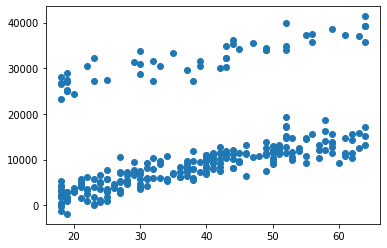

In [10]:
#Age
plt.scatter(test_data['age'], arr_predicted)
plt.show()

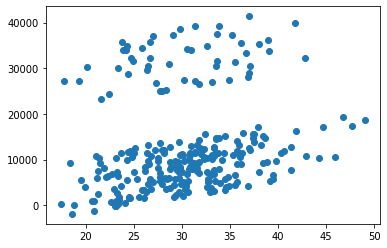

In [11]:
#BMI
plt.scatter(test_data['bmi'], arr_predicted)
plt.show()